In [22]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 11 - DST Lab Spring 2023
## New York University

## State Variable Filter

Used commonly in analog synths: Oberheim OB-X, Yamaha CS-80

Has simultaneous lowpass, highpass and bandpass (and occasionally notch) outputs

Simple relationship between control parameters and filter coefficients. Much easier than canonical 2nd order filter to quickly change cutoff or resonance

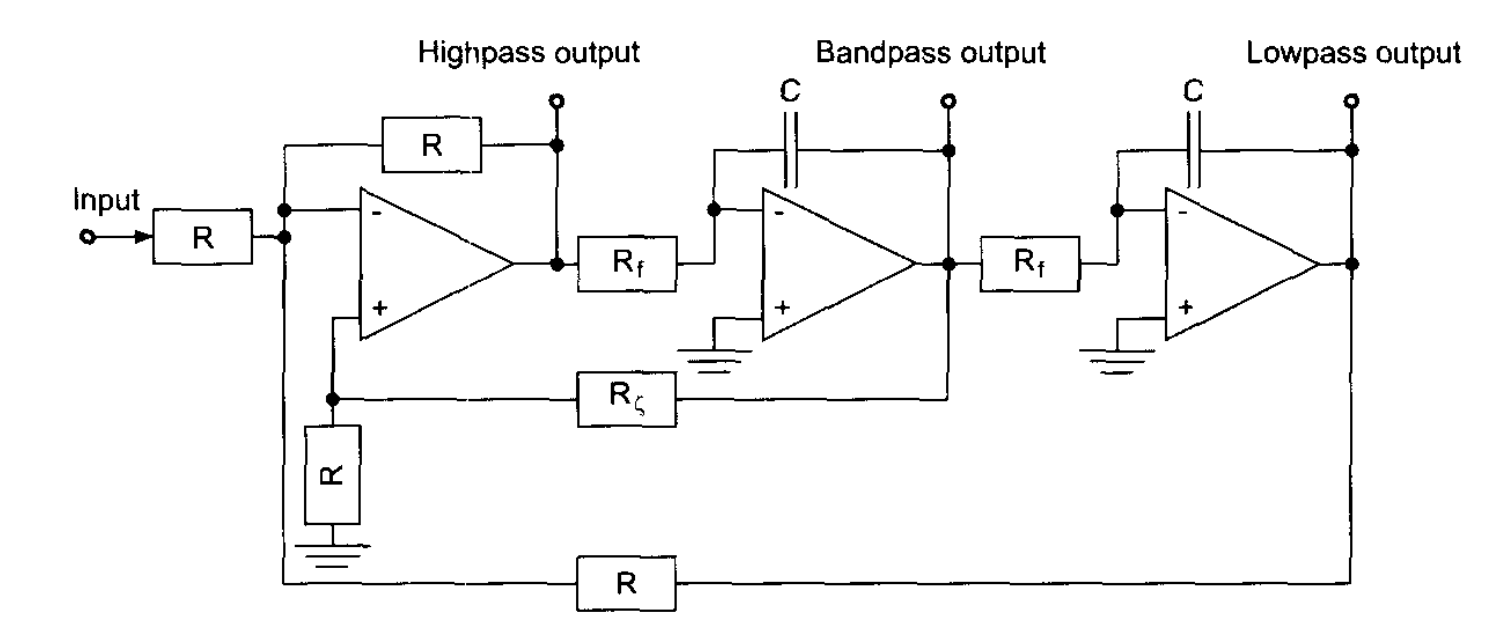

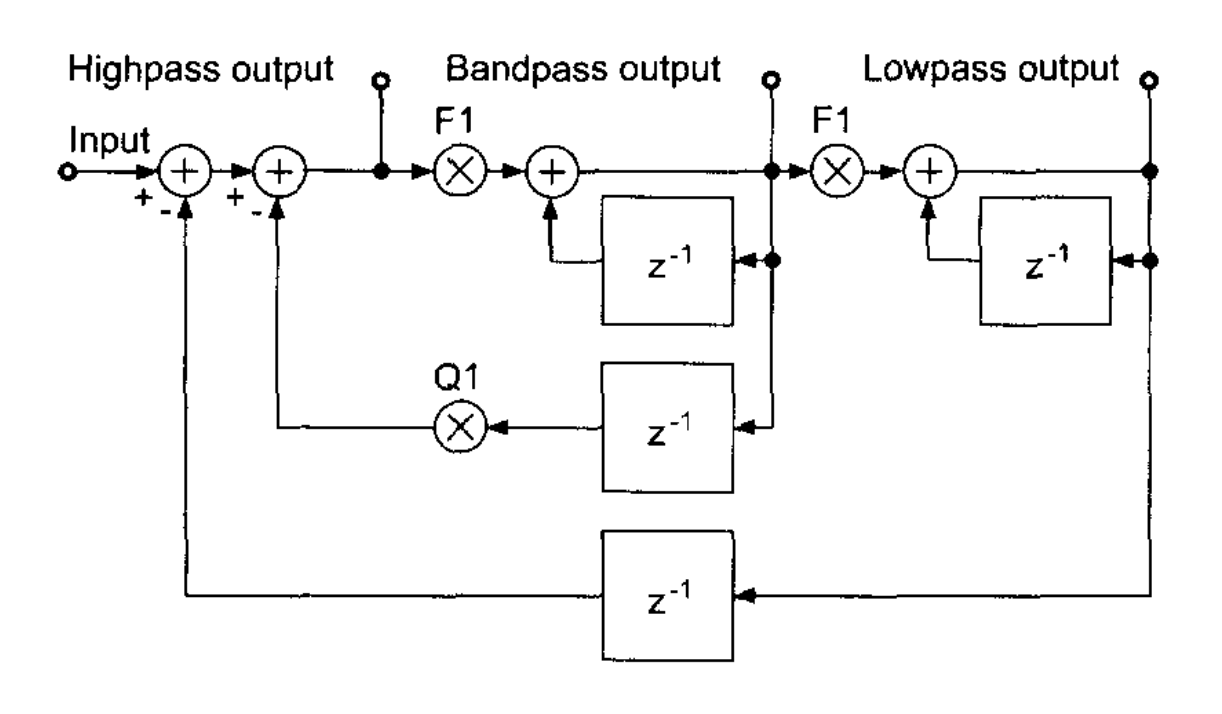

In [23]:
# F1 = 2 * np.sin(np.pi * cutoff_freq / sample_rate)
# Q =  between 0 and 1
# lowPass = bandPass * F1 + low[n-1]
# bandPass = highPass[n] * F1 * band[n-1]
# highPass = x[n] - low[n-1] - band[n-1] * Q 
def svFilter (x, cutoff, sample_rate, Q, filterType):
    F1 = 2 * np.sin(np.pi * cutoff / sample_rate)
    y = np.zeros(len(x))
    low = 0
    high = 0
    band = 0
    for n in range(len(x)):
        low = band * F1 + low
        high = x[n] - low - band * Q
        band = high * F1 + band
        notch = low + high
        if filterType == 'low':
            y[n] = low
        elif filterType == 'high':
            y[n] = high
        elif filterType == 'band':
            y[n] = band
        elif filterType == 'notch':
            y[n] = notch
    return y
    

In [31]:
data, sr = sf.read("sig.wav")
my_sweep = np.linspace(100, 1000, len(data))


y = svFilter(data, 500, sr, .2, "low")
z = svFilter(my_sweep, 500, sr, .2, "high")

# Audio(y, rate = sr)
Audio(z, rate = sr)

## Filter Sweep

## DELAY STRUCTURES

## FIR (Feedforward) Comb
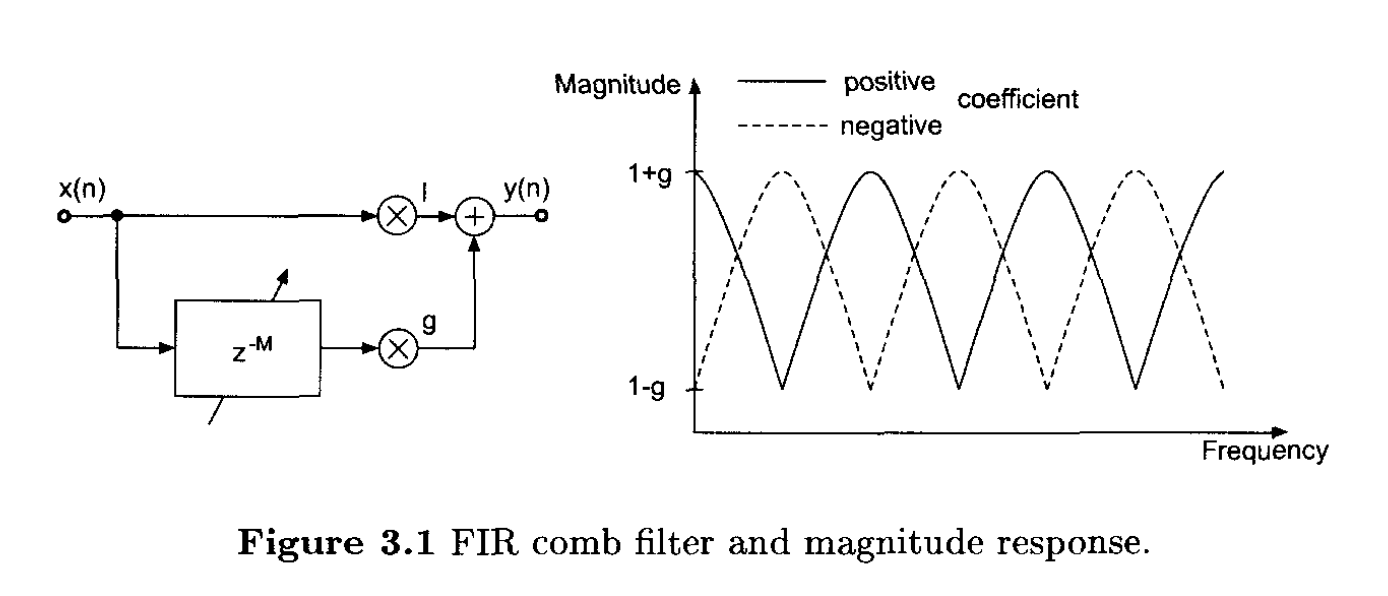

## IIR (Feedback) Comb
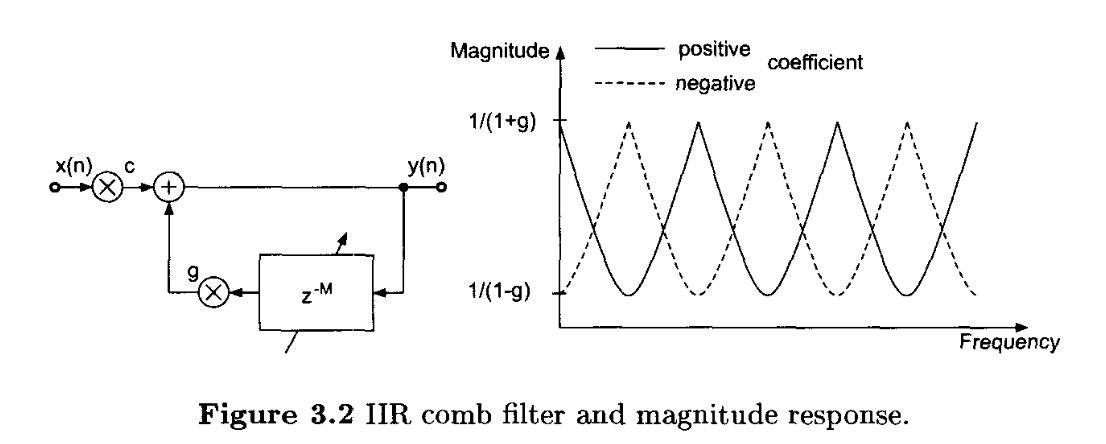

# Allpass (Schroeder allpass comb filter)
Filter has gain of 1 at all frequencies but different phase shifts (delays) at different frequencies

## Allpass filters and delay based effects

## Chorus Effect



In [25]:
def sine_gen(amplitude, frequency, phase, duration, sample_rate):
    t_v = np.arange(0, duration, 1/sample_rate) 
    output = amplitude * np.sin(2 * np.pi * frequency * t_v + phase)
    return output

In [32]:
data, sr = sf.read("Guitar.wav")
y = chorusSine(data, sr)

Audio(y, rate = sr)

NameError: name 'chorusSine' is not defined

In [ ]:
data, sr = sf.read("Guitar.wav")

y = chorusNoise(data, sr)

Audio(y, rate = sr)

In [ ]:
data, sr = sf.read("Guitar.wav")

y = chorusNoiseTwo(data, sr)

Audio(y, rate = sr)


# Freeverb Algorithm

LBCF = lowpass feedback comb filter (IIR comb with lowpass filter in feedback loop)

AP = Schroeder allpass

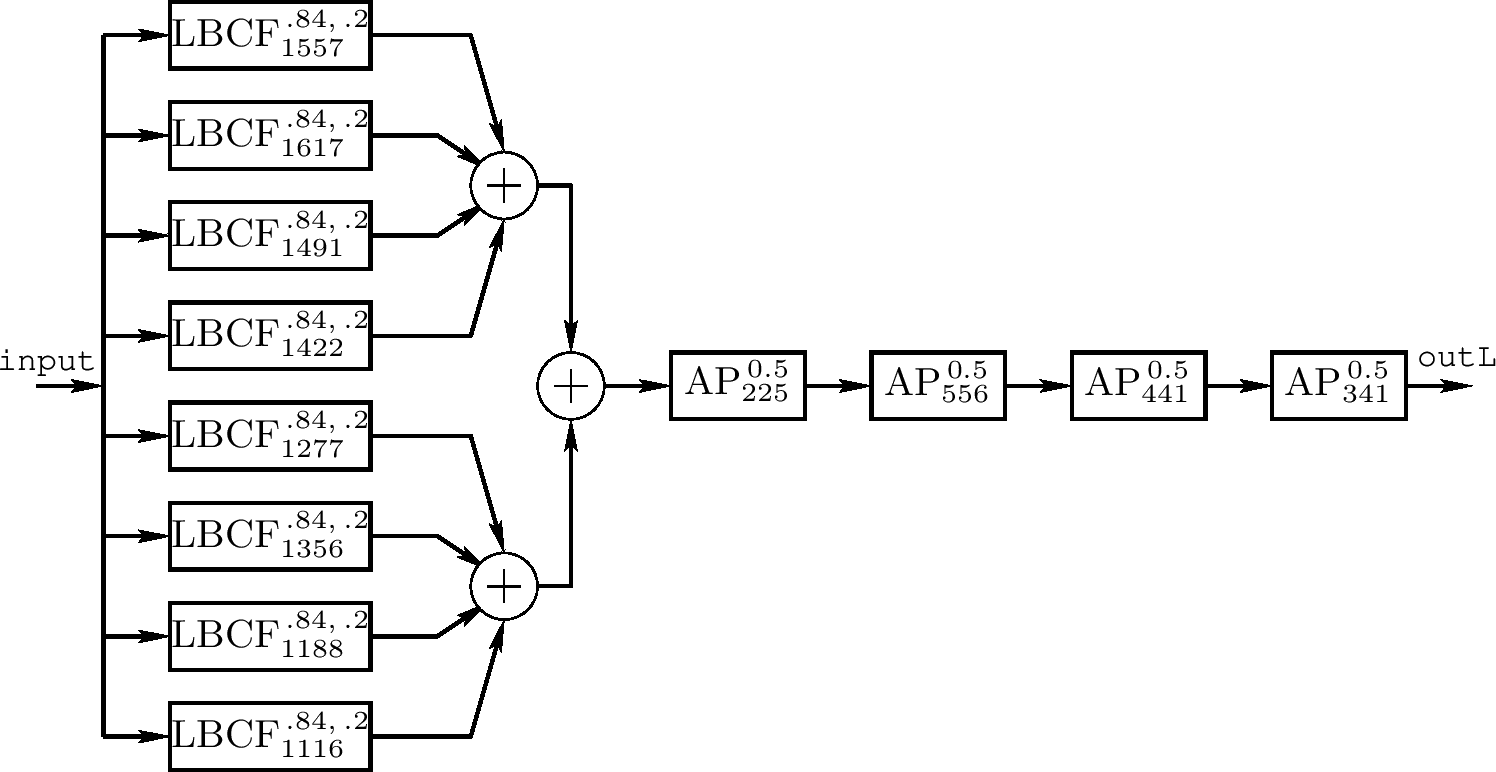

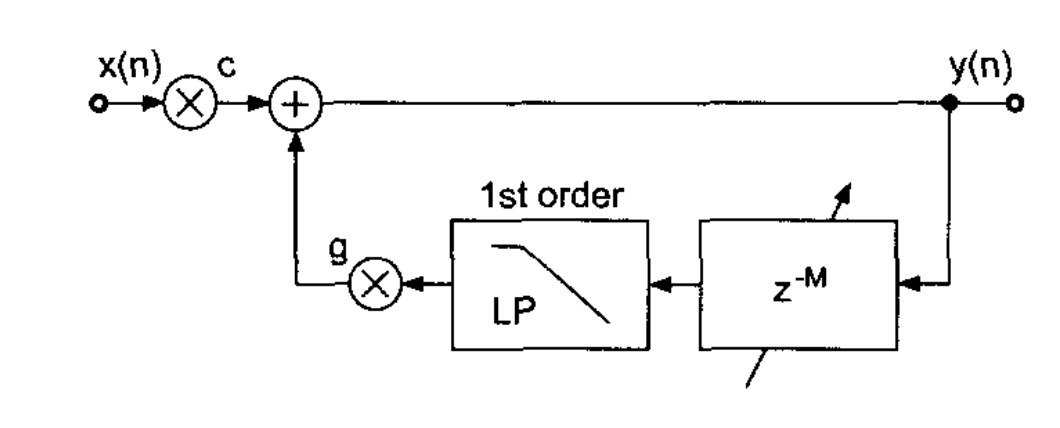